In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def plot_bar(data_series, title, xlabel, ylabel, percentages=False):
    """
    Plot a bar chart with percentages on top of each bar.
    
    Parameters:
    data_series (pd.Series): Series containing the data to plot.
    title (str): Title of the plot.
    xlabel (str): Label for the x-axis.
    ylabel (str): Label for the y-axis.
    """
    # Create the bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = data_series.plot(kind='bar', ax=ax, legend=False)
    if percentages:
        # Calculate percentages
        total = data_series.sum()
        
        # Add percentages on top of bars
        for i, (label, value) in enumerate(data_series.items()):
            percentage = (value / total * 100).round(2)
            ax.annotate(f'{percentage}%', 
                    xy=(i, value),
                    ha='center', 
                    va='bottom', 
                    fontsize=10,
                    color='black')
        
    # Set labels and title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [4]:
data = pd.read_csv('../data_final_project/KuaiRec 2.0/data/user_features.csv')
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                7176 non-null   int64  
 1   user_active_degree     7176 non-null   object 
 2   is_lowactive_period    7176 non-null   int64  
 3   is_live_streamer       7176 non-null   int64  
 4   is_video_author        7176 non-null   int64  
 5   follow_user_num        7176 non-null   int64  
 6   follow_user_num_range  7176 non-null   object 
 7   fans_user_num          7176 non-null   int64  
 8   fans_user_num_range    7176 non-null   object 
 9   friend_user_num        7176 non-null   int64  
 10  friend_user_num_range  7176 non-null   object 
 11  register_days          7176 non-null   int64  
 12  register_days_range    7176 non-null   object 
 13  onehot_feat0           7176 non-null   int64  
 14  onehot_feat1           7176 non-null   int64  
 15  oneh

## Analysis of the non-encoded columns
### 1. Analysis of the column `user_active_degree`

user_active_degree
full_active      6092
high_active       938
UNKNOWN           118
middle_active      28
Name: count, dtype: int64


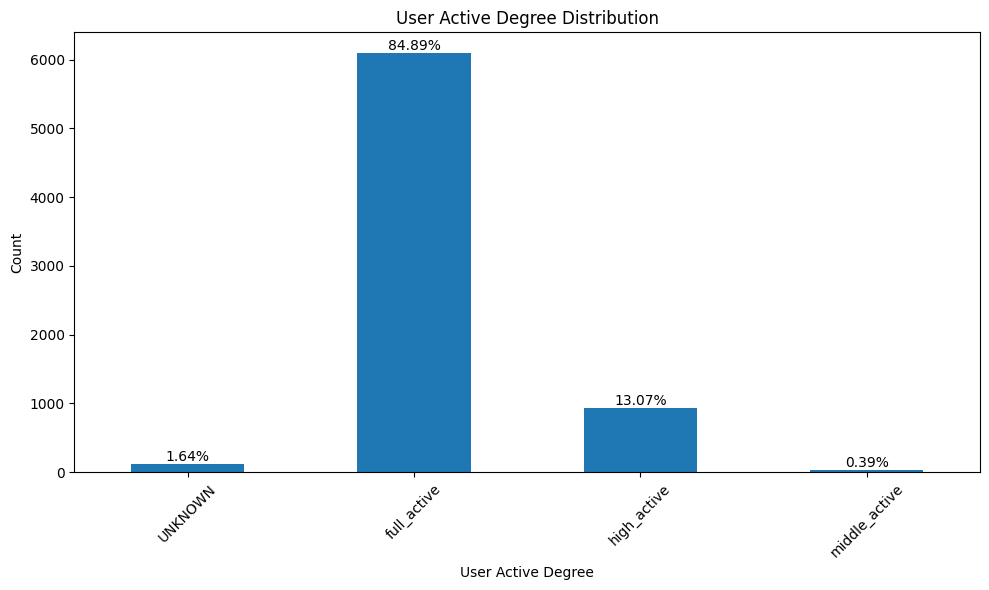

In [33]:
user_active_degree_counts = data['user_active_degree'].value_counts()
print(user_active_degree_counts)
user_active_degree_counts = user_active_degree_counts.sort_index()

# Plot the bar chart with percentages
plot_bar(
    user_active_degree_counts,
    title='User Active Degree Distribution',
    xlabel='User Active Degree',
    ylabel='Count',
    percentages=True
)

As seen above most of the users are fully active. but not all of them. This information should be kept in the dataset.

### 2. Analysis of the column `is_lowactive_period`

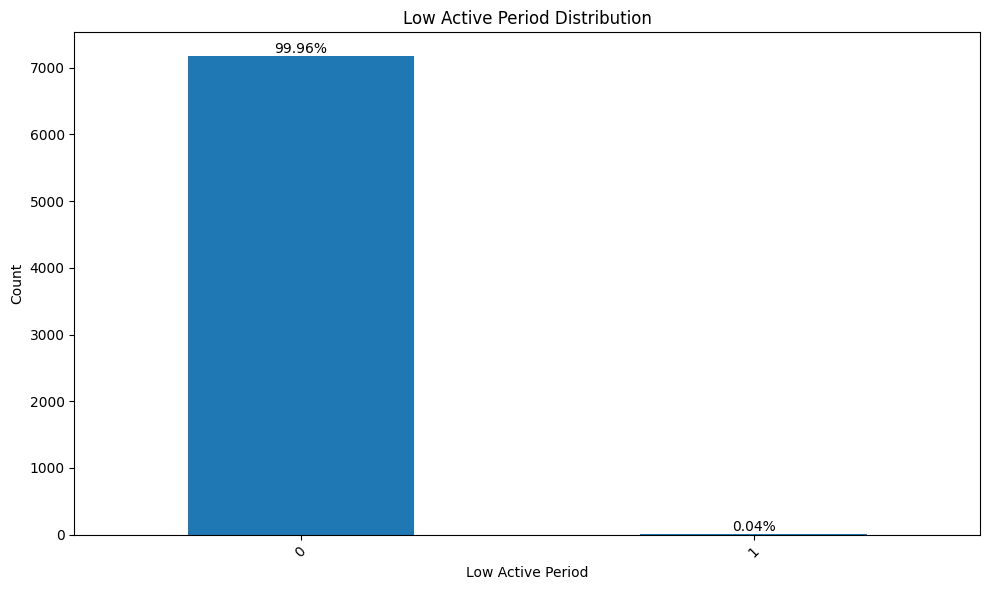

In [34]:
is_lowactive_period_counts = data['is_lowactive_period'].value_counts()
plot_bar(
    is_lowactive_period_counts,
    title='Low Active Period Distribution',
    xlabel='Low Active Period',
    ylabel='Count',
    percentages=True
)

As there are less than **0.04%** of users in a low active period, this column can be dropped. It does not add any information to the dataset.
### 3. Analysis of the column `is_live_streamer`

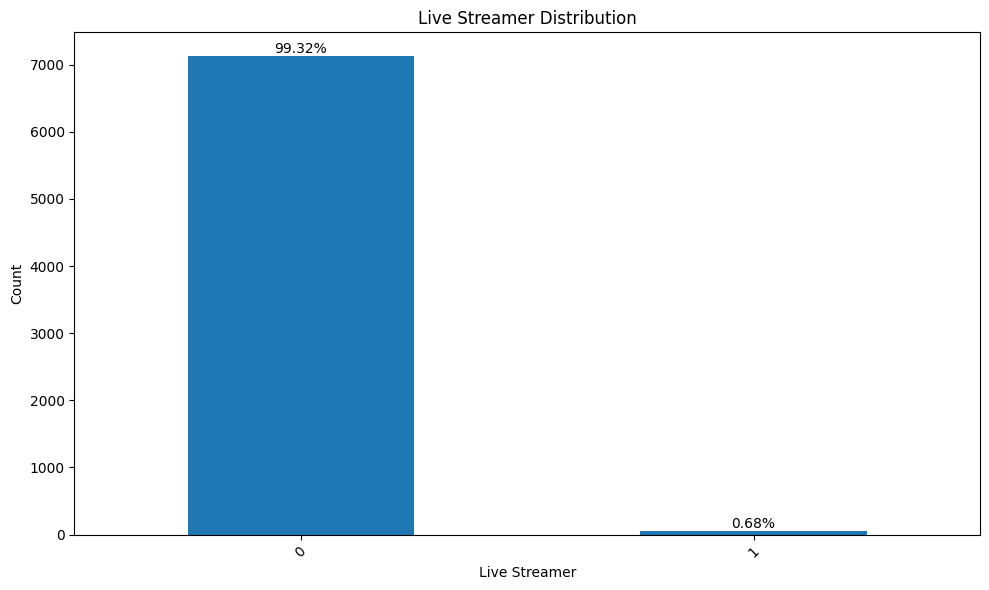

In [35]:
is_live_streamer_counts = data['is_live_streamer'].value_counts()
plot_bar(
    is_live_streamer_counts,
    title='Live Streamer Distribution',
    xlabel='Live Streamer',
    ylabel='Count',
    percentages=True
)


As less than **0.68%** of the users are live streamers, this column can be dropped. It does not add any information to the dataset.
### 4. Analysis of the column `is_video_author`

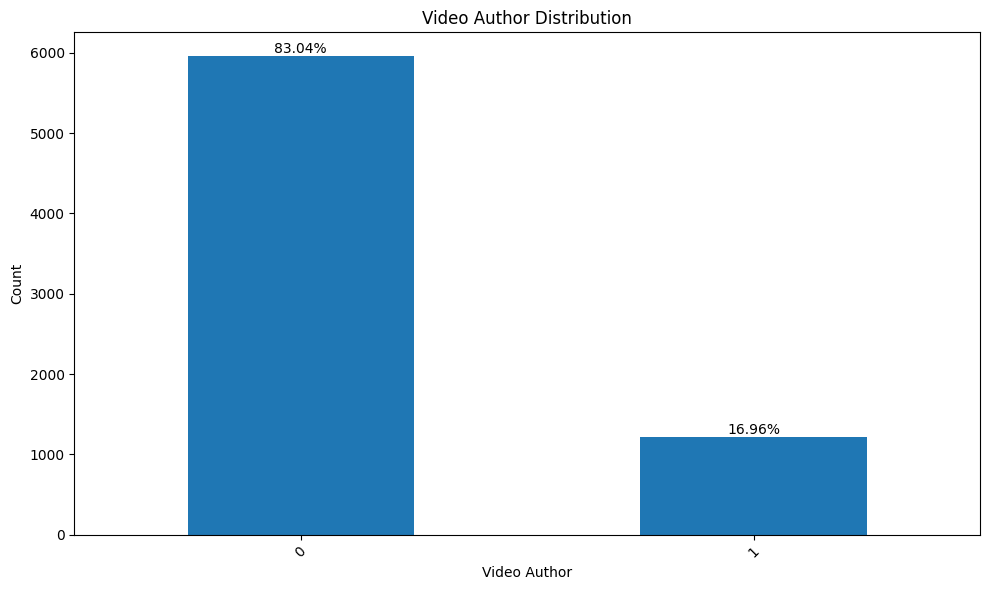

In [36]:
is_video_author_counts = data['is_video_author'].value_counts()
plot_bar(
    is_video_author_counts,
    title='Video Author Distribution',
    xlabel='Video Author',
    ylabel='Count',
    percentages=True
)

For this column, there are more than **16.96%** of users who are video authors. This column can be kept in the dataset as it adds information about the users.
### 5. Analysis of the column `follow_user_num`

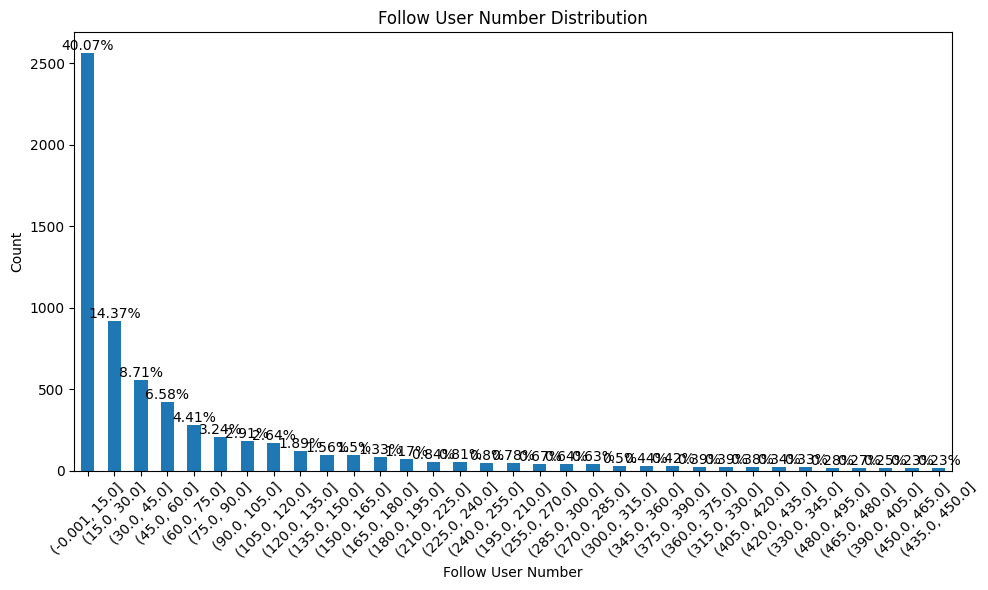

In [43]:
# count by ranges of follow_user_num of 15
follow_user_num_counts = data['follow_user_num'].value_counts(bins=range(0, 500, 15))
plot_bar(
    follow_user_num_counts,
    title='Follow User Number Distribution',
    xlabel='Follow User Number',
    ylabel='Count',
    percentages=True
    
)

This column is a quantitative column. It can be kept in the dataset as it adds information about the users. The number of followers of a said user can inform the model about their activity on the platform.
### 6. Analysis of the column `follow_user_num_range`

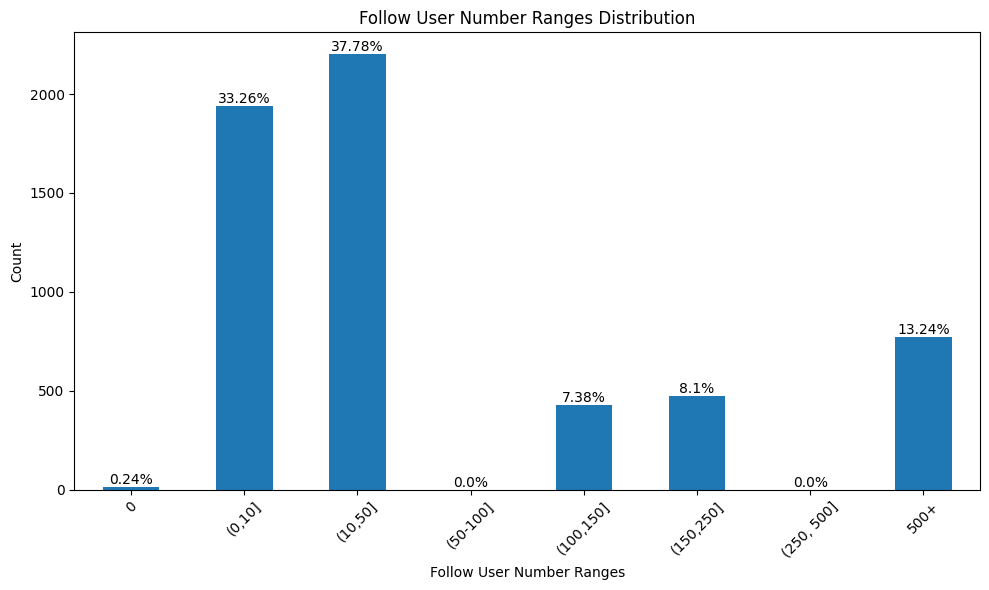

In [42]:
follow_user_num_ranges = data['follow_user_num_range'].value_counts()
# Specify the order of the categories
follow_user_num_ranges = follow_user_num_ranges.reindex(
    ['0','(0,10]','(10,50]', '(50-100]', '(100,150]', '(150,250]', '(250, 500]', '500+'], fill_value=0
)
# Plot the bar chart with percentages
plot_bar(
    follow_user_num_ranges,
    title='Follow User Number Ranges Distribution',
    xlabel='Follow User Number Ranges',
    ylabel='Count',
    percentages=True
)

This column is a string column that represents the range of the number of followers of a user. This a duplicate of the column `follow_user_num`. In my opinion, this column should be dropped from the dataset as the informations it contains is available elsewhere in a numerical format. But as it suppress numerical ouliers that may disrupt the model, It may be interesting to keep it in the dataset. For now, it will be dropped but it can be added back later if needed after establishing a baseline model for `content-base` recommendation and comparing the results with and without it.
### 7. Analysis of the column `fans_user_num`

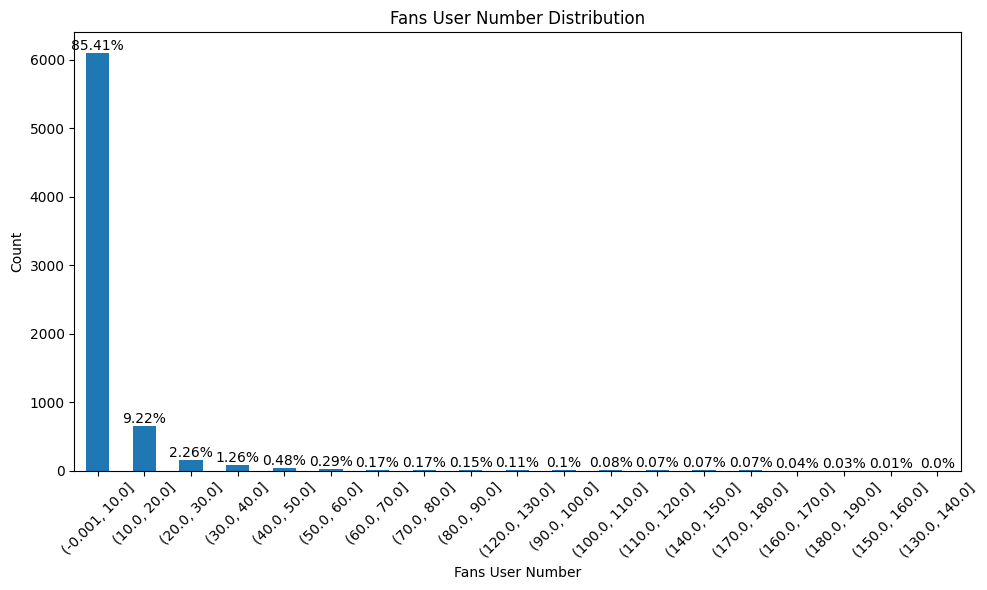

In [46]:
fans_user_num_counts = data['fans_user_num'].value_counts(bins=range(0, 200, 10))
plot_bar(
    fans_user_num_counts,
    title='Fans User Number Distribution',
    xlabel='Fans User Number',
    ylabel='Count',
    percentages=True
)

It seems that in Kuaishou, the number of followers is not the same as the number of fans. This column is a quantitative column. It can be kept in the dataset as it adds information about the users. The number of fans of a said user can inform the model about their popularity on the platform for example.
### 8. Analysis of the column `fans_user_num_range`
This column is a string column that represents the range of the number of fans of a user. The same analysis can be applied to this column as the `follow_user_num_range` column.

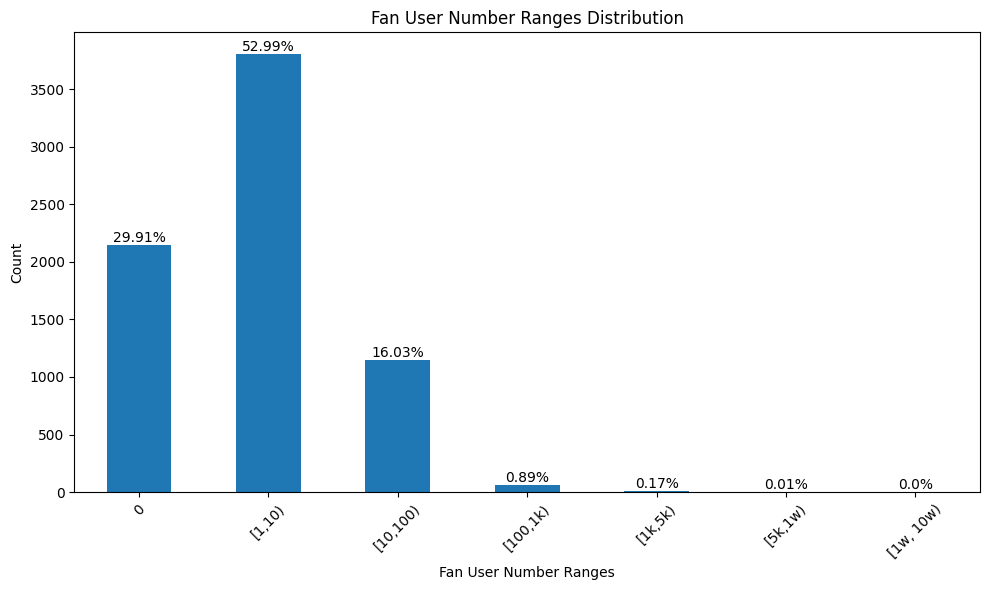

In [49]:
fans_user_num_range = data['fans_user_num_range'].value_counts()
# Specify the order of the categories
fans_user_num_range = fans_user_num_range.reindex(
    ['0','[1,10)','[10,100)', '[100,1k)', '[1k,5k)', '[5k,1w)', '[1w, 10w)'], fill_value=0
)
# Plot the bar chart with percentages
plot_bar(
    fans_user_num_range,
    title='Fan User Number Ranges Distribution',
    xlabel='Fan User Number Ranges',
    ylabel='Count',
    percentages=True
)

### 9. Analysis of the column `register_days`

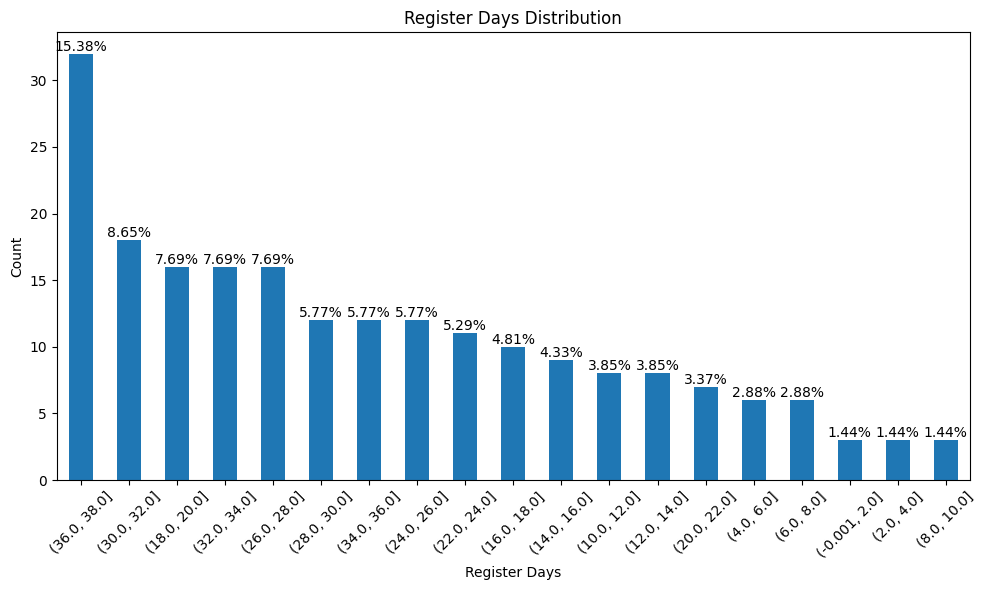

In [52]:
register_days_counts = data['register_days'].value_counts(bins=range(0, 40, 2))
plot_bar(
    register_days_counts,
    title='Register Days Distribution',
    xlabel='Register Days',
    ylabel='Count',
    percentages=True
)

This column is a quantitative column. It represent the number of days since the user registered on the platform. It can be kept in the dataset as it adds information about the users. The number of days since a user registered on the platform can inform the model about the user's seniority on the platform. Users who are on the platform for a long time may have different behaviors than users who are new to the platform.

### 10. Analysis of the column `register_days_range`
For the same reasons as the `follow_user_num_range` and `fans_user_num_range` columns, this column will be dropped for now but may be re-added after some tests.

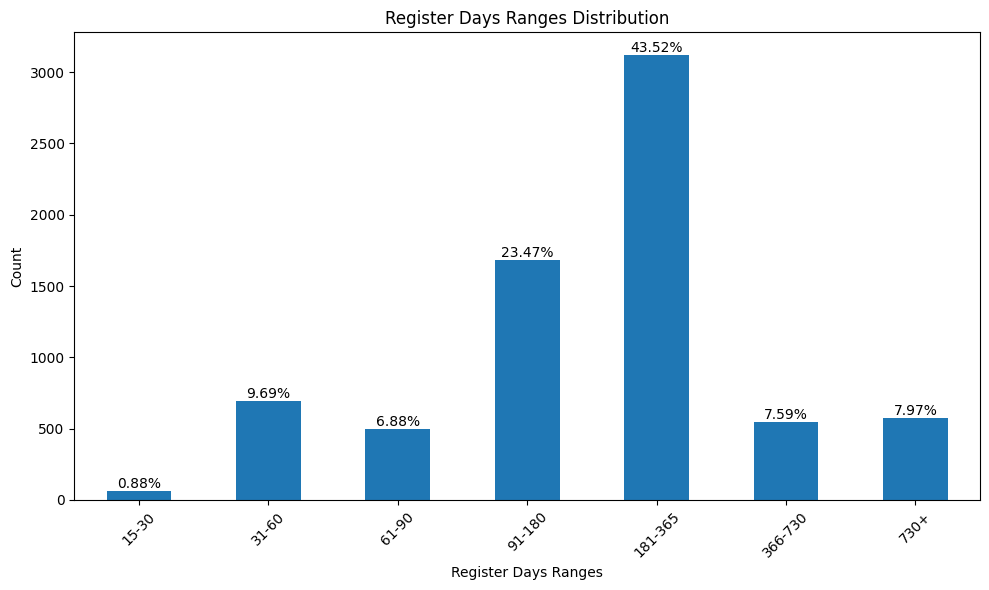

In [53]:
register_days_range = data['register_days_range'].value_counts()
register_days_range = register_days_range.reindex(
    ['15-30', '31-60', '61-90', '91-180', '181-365', '366-730', '730+'], fill_value=0
)
plot_bar(
    register_days_range,
    title='Register Days Ranges Distribution',
    xlabel='Register Days Ranges',
    ylabel='Count',
    percentages=True
)

# Analysis of the encoded columns
There is no description of the encoded columns in the dataset. But as we can see in the data dictionary, there are 18 columns that are encoded either with a one-hot encoding or with numerical values.
These contains private information about the users. There is no way to know what these columns represent. These informations may be useful for the model but they may also be useless. 

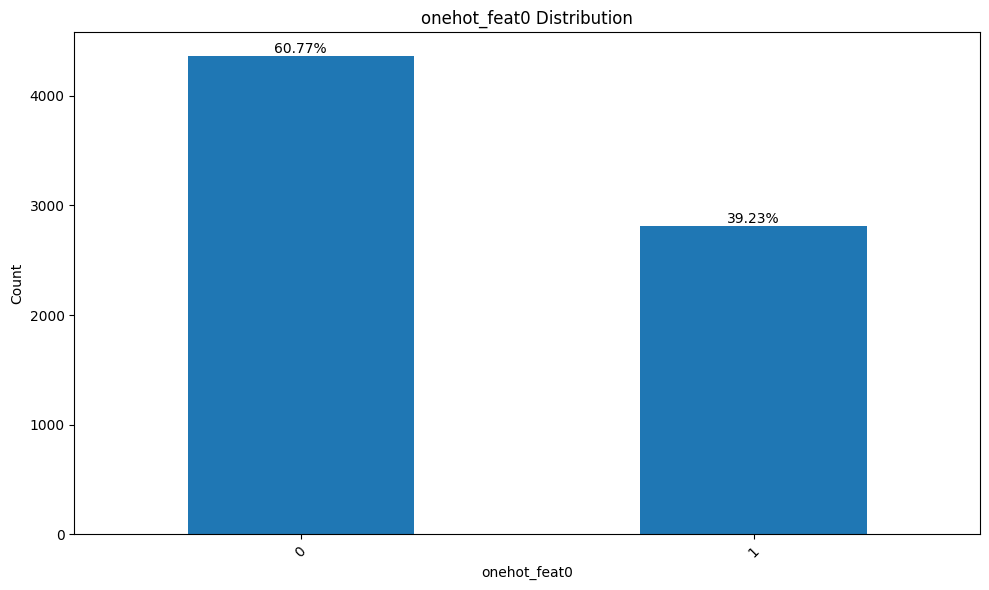

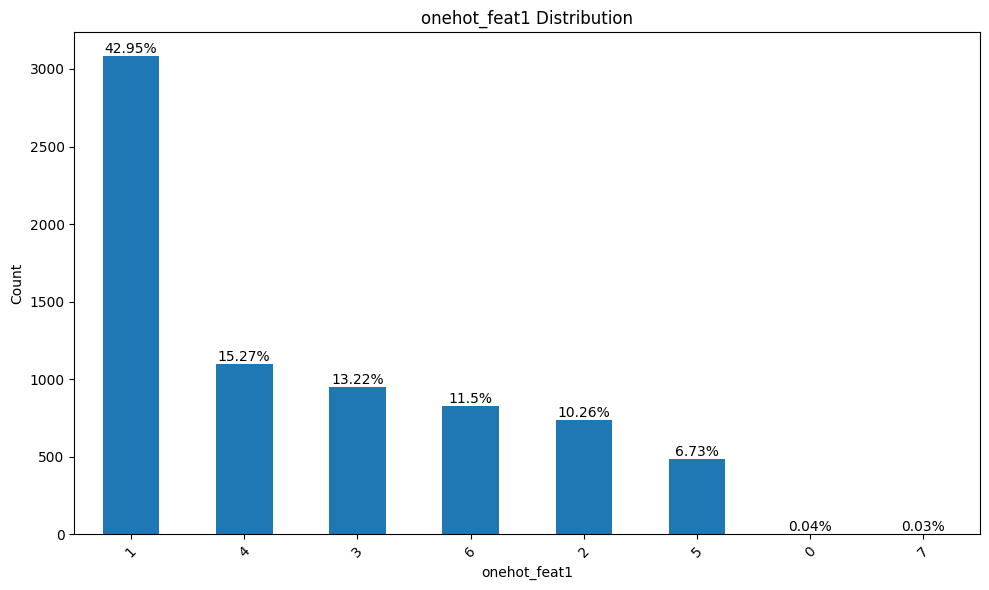

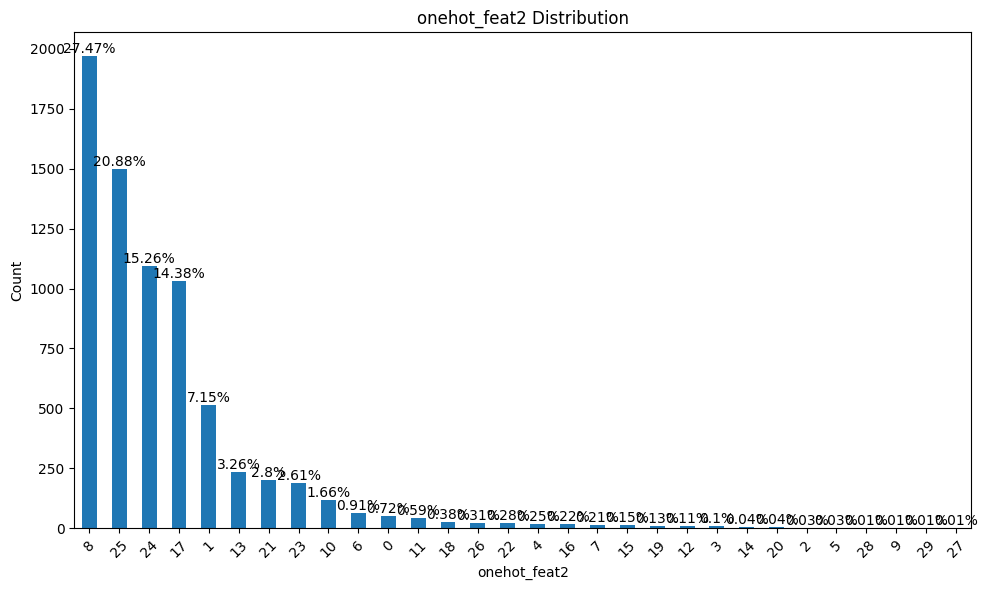

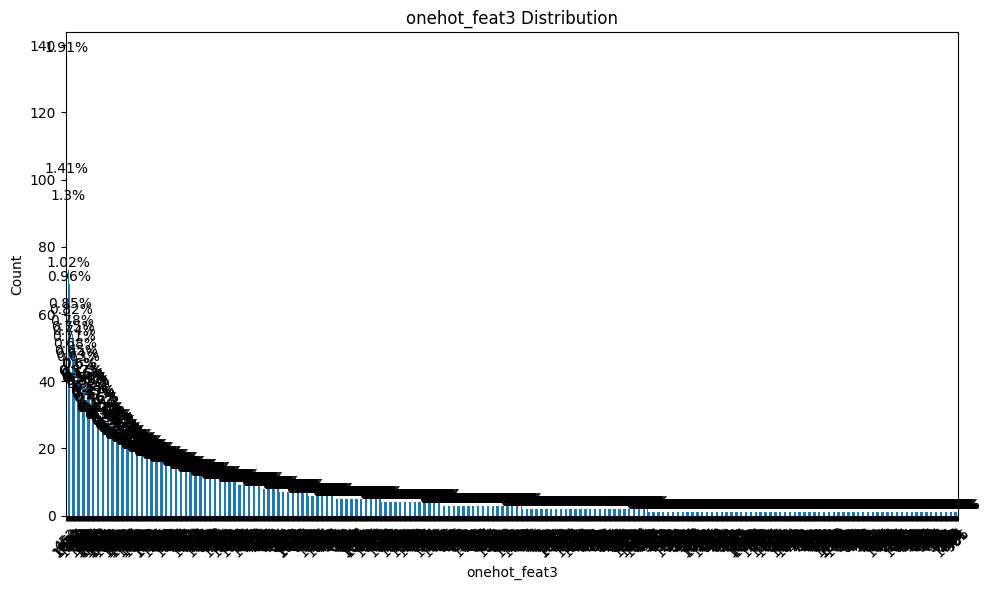

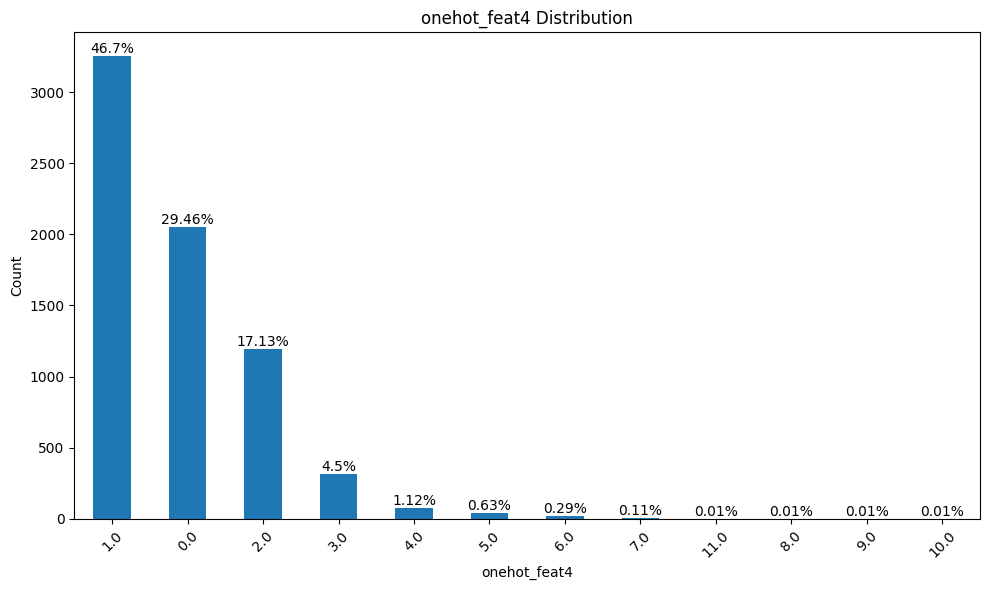

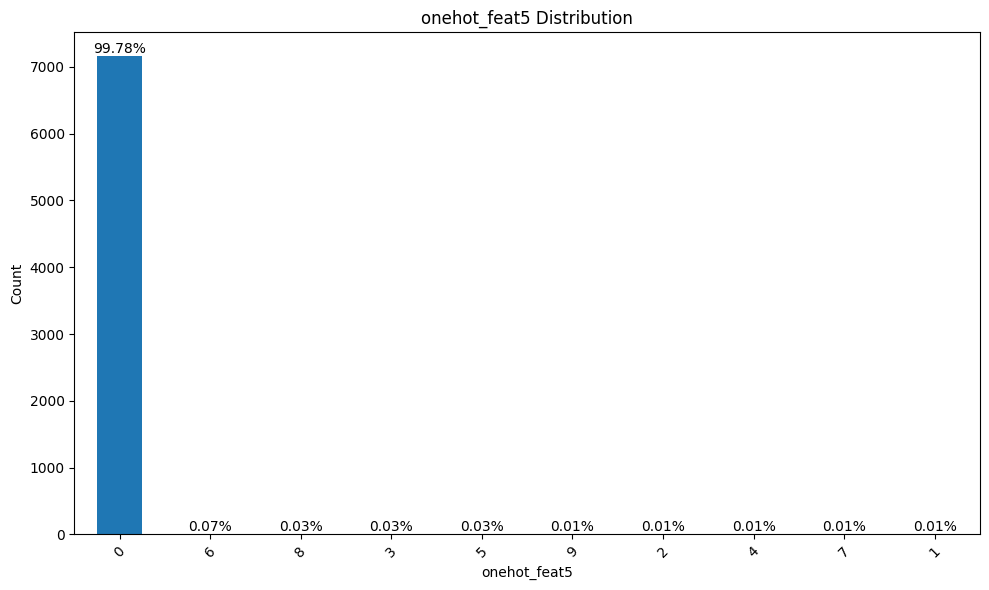

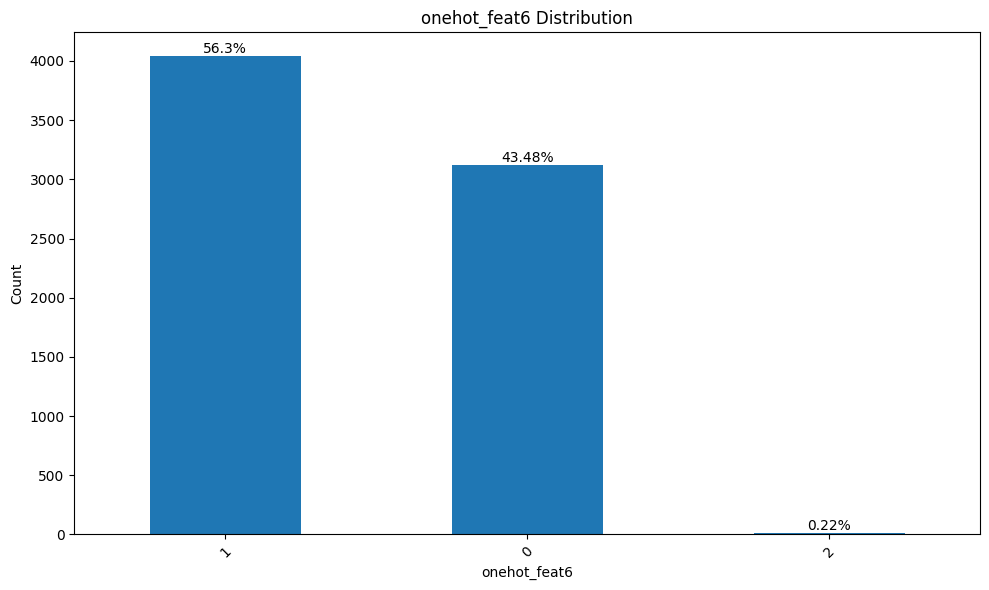

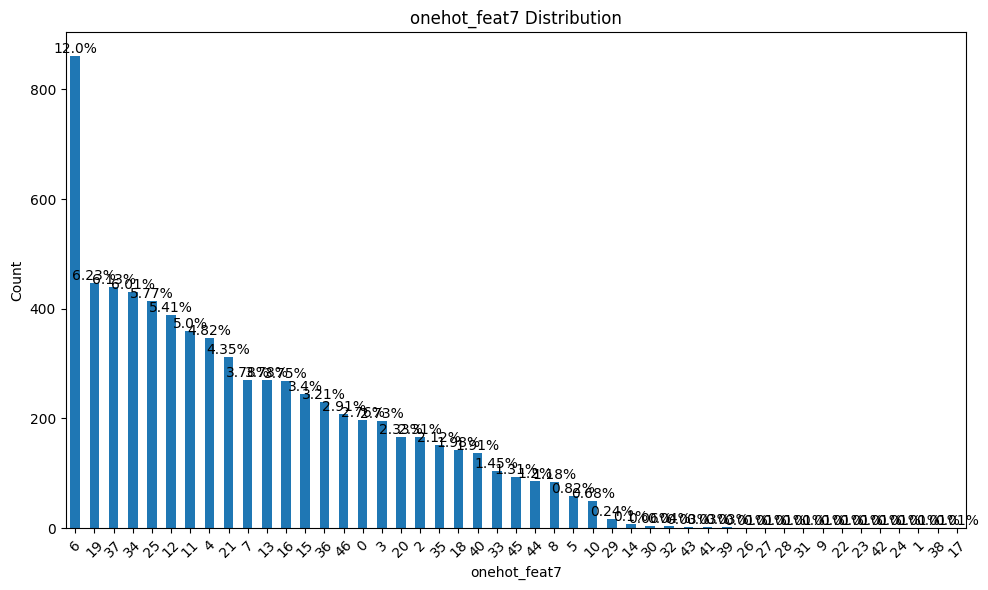

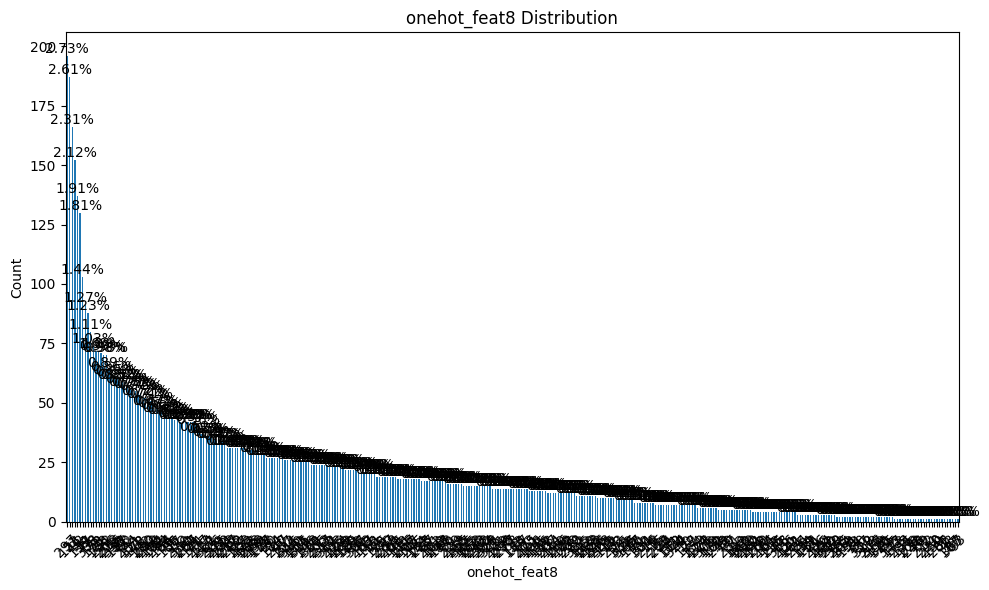

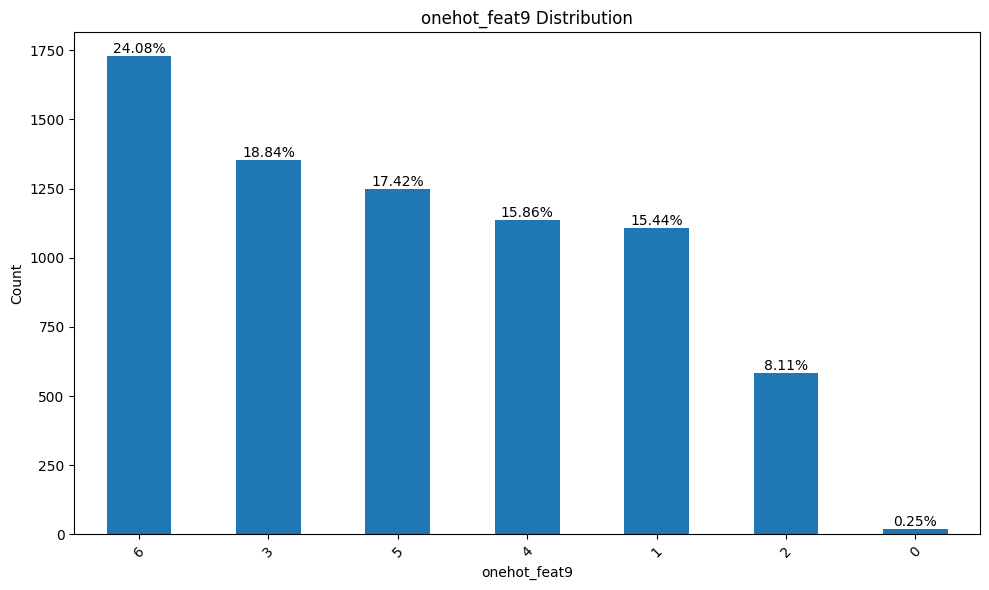

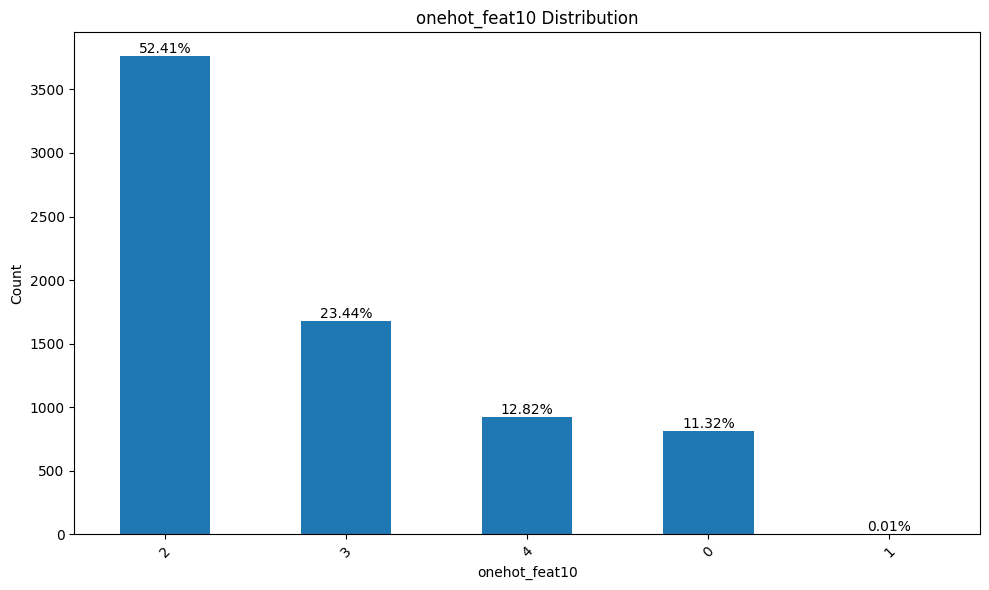

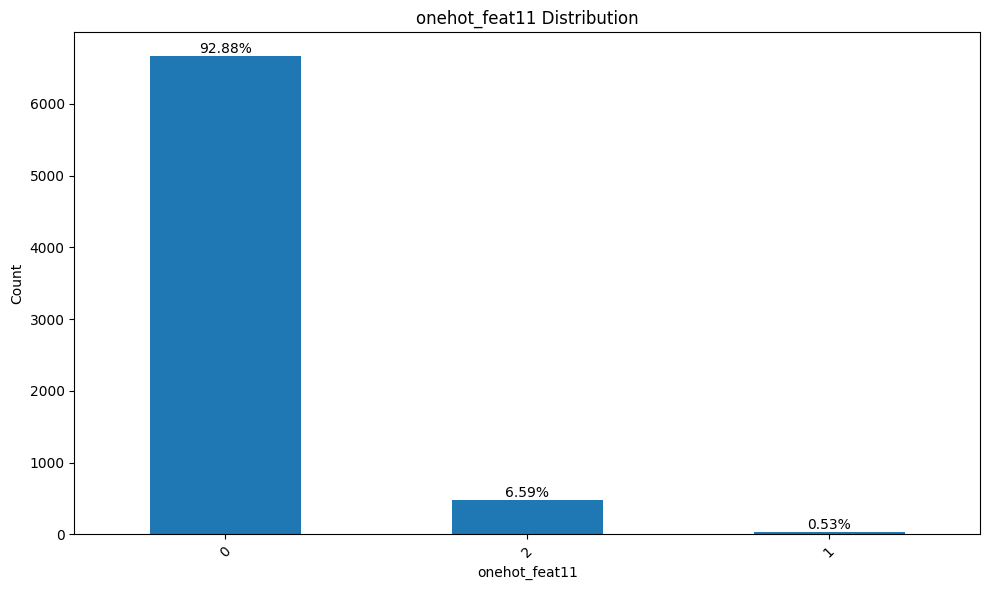

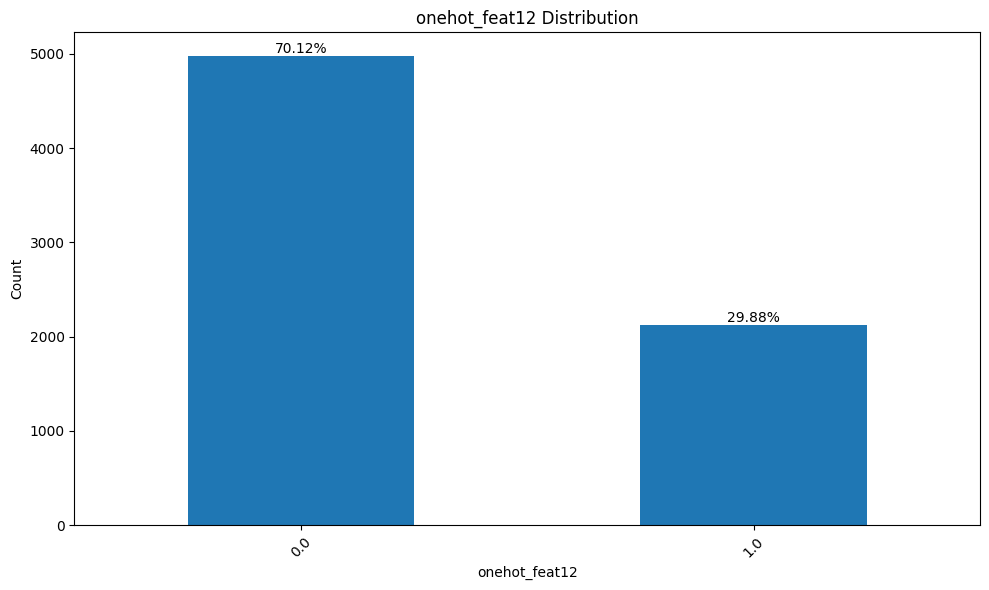

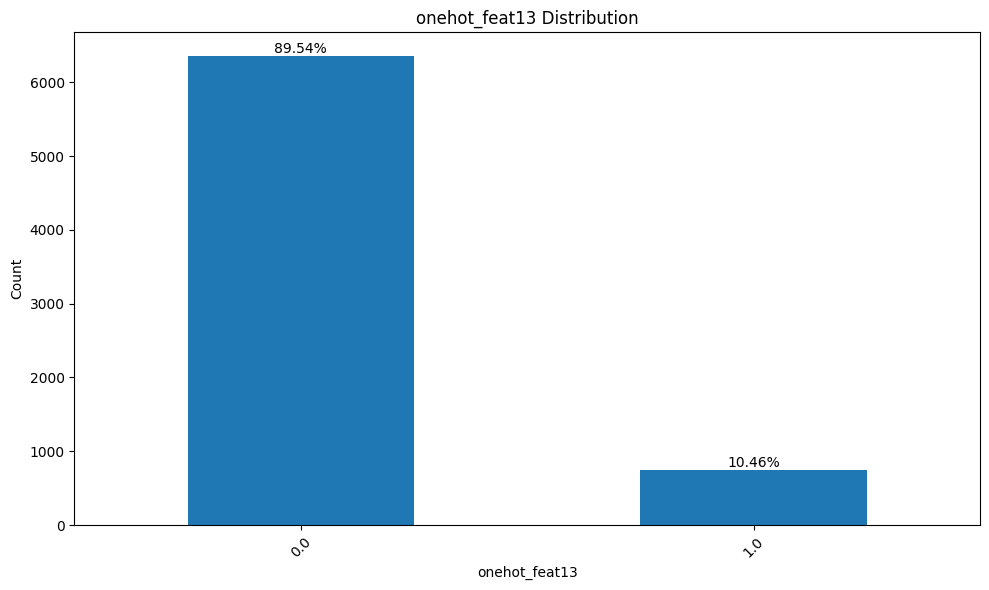

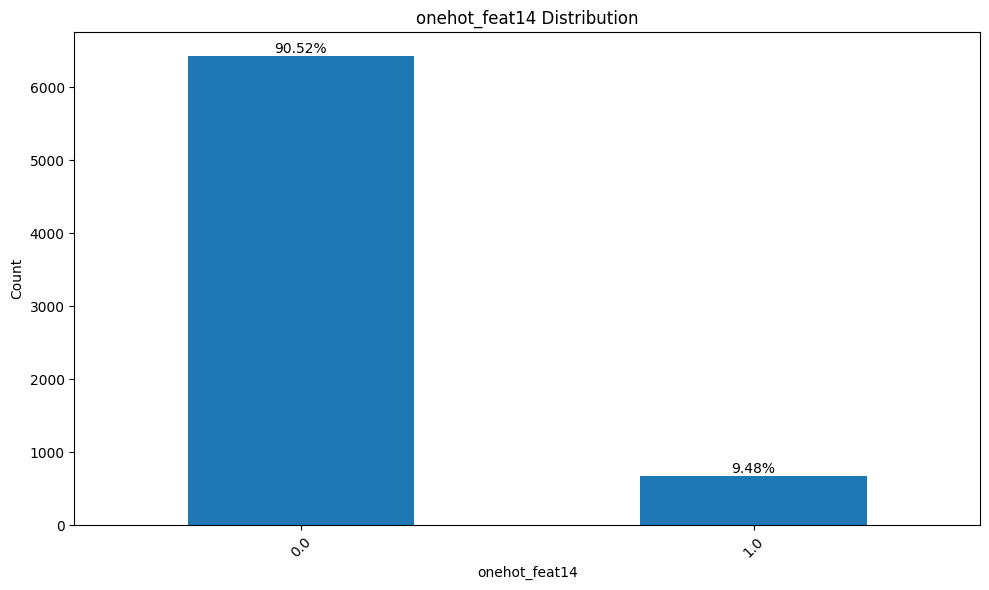

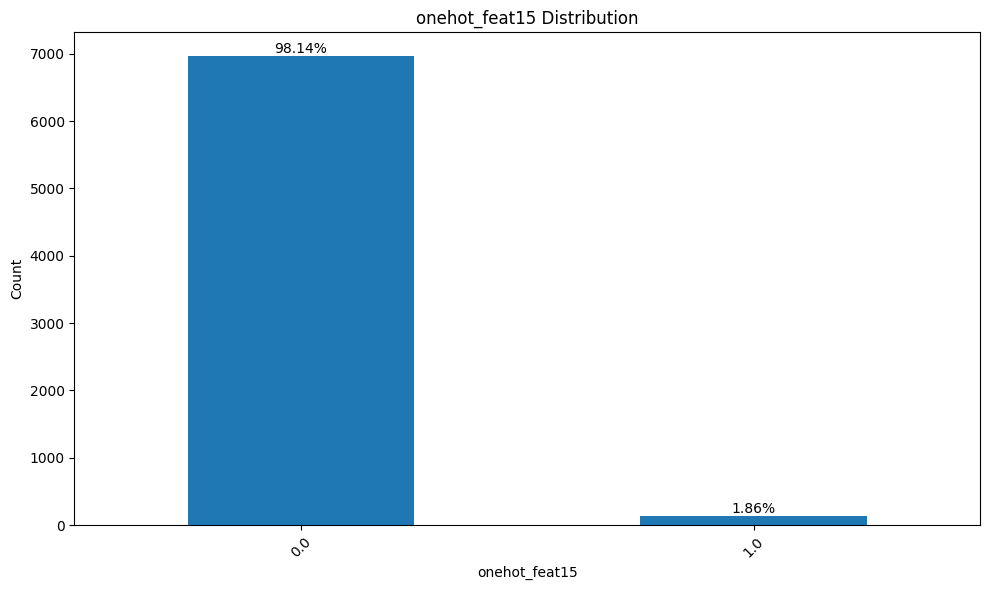

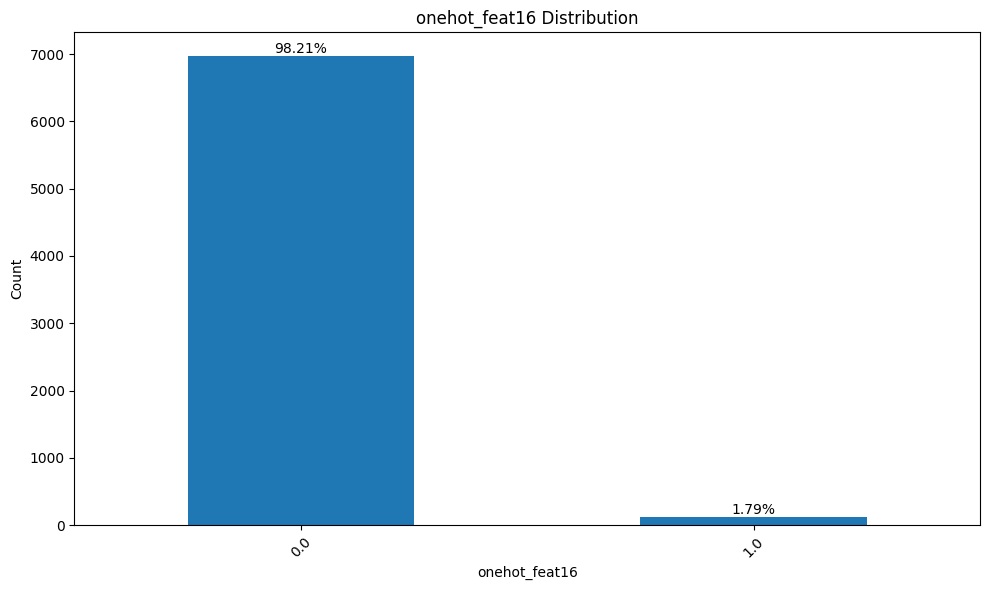

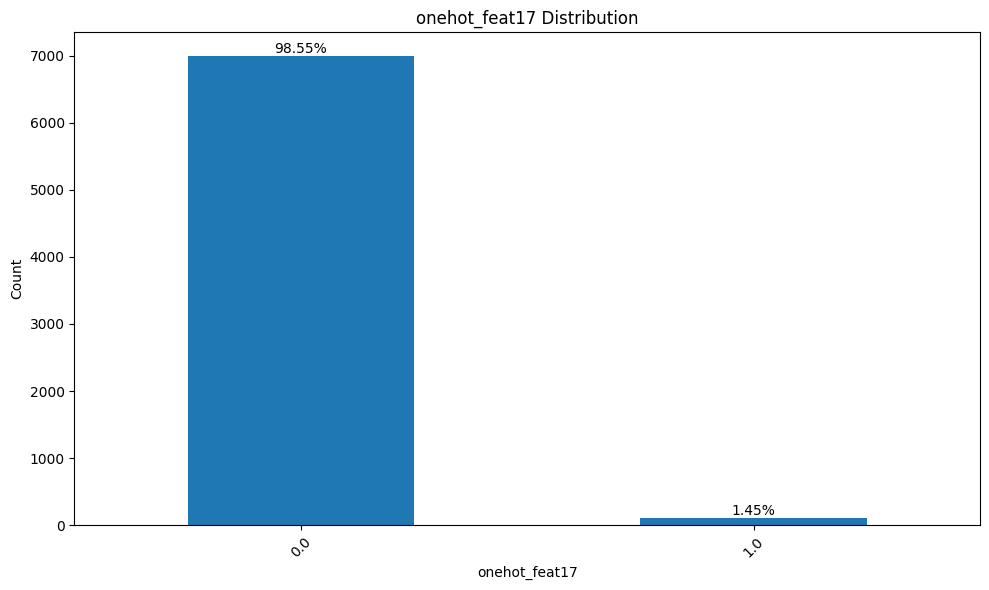

In [7]:
onehot_columns = [col for col in data.columns if 'onehot_feat' in col]
for col in onehot_columns:
    onehot_counts = data[col].value_counts()

    plot_bar(
        onehot_counts,
        title=f'{col} Distribution',
        xlabel=col,
        ylabel='Count',
        percentages=True
    )

We can at least drop the encoded columns that have a very low number of users. In our case, we can drop the following columns:
- onehot_encoded_5
- onehot_encoded_15
- onehot_encoded_16
- onehot_encoded_17
 

# Analysis of the `items_categories` dataset

In [3]:
items_data = pd.read_csv('../data_final_project/KuaiRec 2.0/data/item_categories.csv')
print(items_data.head())
items_data.info(memory_usage='deep')

   video_id     feat
0         0      [8]
1         1  [27, 9]
2         2      [9]
3         3     [26]
4         4      [5]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10728 entries, 0 to 10727
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  10728 non-null  int64 
 1   feat      10728 non-null  object
dtypes: int64(1), object(1)
memory usage: 641.8 KB


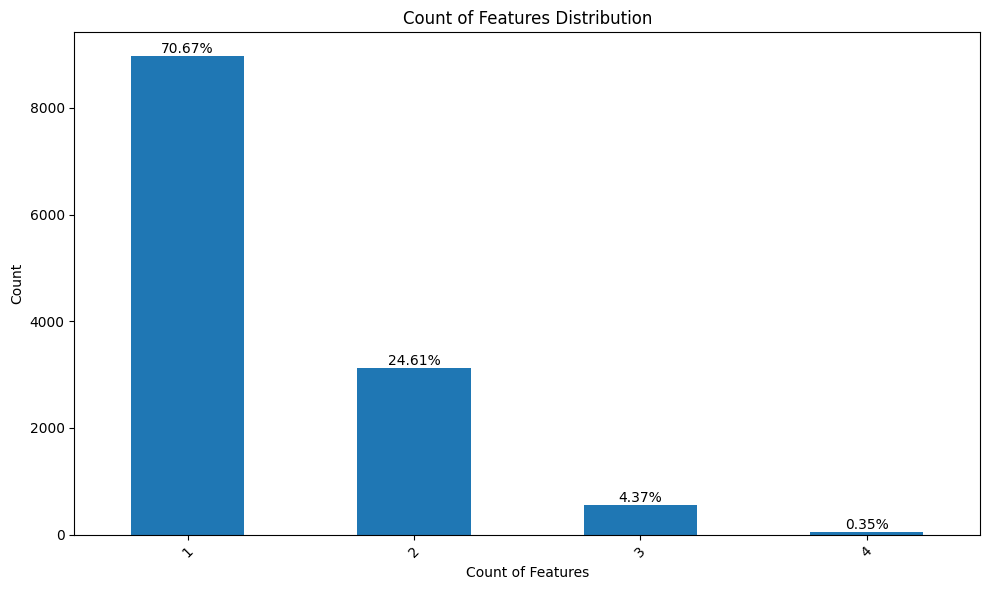

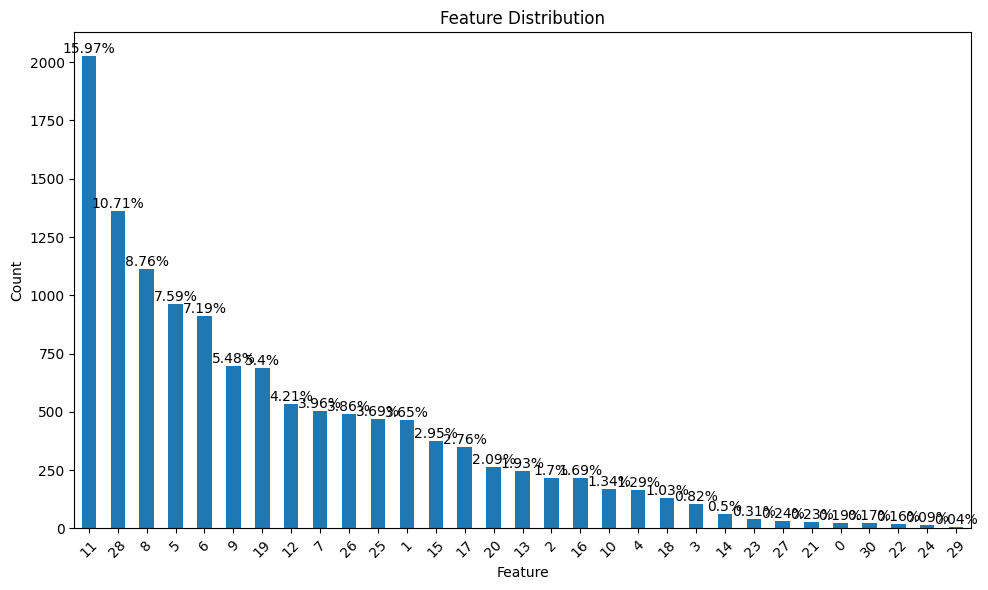

In [4]:
items_data["feat"] = items_data["feat"].map(eval)
items_data.set_index('video_id', inplace=True)
items_data['count_feat'] = items_data['feat'].apply(lambda x: len(x))
items_data = items_data.explode('feat', ignore_index=True)
items_data['feat'] = items_data['feat'].astype('Int16')
plot_bar(
    items_data['count_feat'].value_counts(),
    title='Count of Features Distribution',
    xlabel='Count of Features',
    ylabel='Count',
    percentages=True
)
# distribution of features
plot_bar(
    items_data['feat'].value_counts(),
    title='Feature Distribution',
    xlabel='Feature',
    ylabel='Count',
    percentages=True
)

The `items_categories` dataset contains the categories of the items. It contains 2 columns:
- `video_id`: the id of the video
- `feat`: a list of the categories of the video. The categories are separated by a comma and are represented as integer values from 0 to 30.

A third column has been added to the dataset to analyze the number of categories of each video but will be dropped later for the training of the model. The first graph above shows us that most the videos have 1 or 2 categories, the second graph shows us the distribution of the categories after exploding the list of categories.

This is the only data available about the videos. It is not possible to know the content of the videos in human language but the model may be able to learn the meaning of the categories if we encode them properly. So we will keep this column in the dataset but we will use an one-hot encoding to encode the categories. This will allow us to have a binary representation of the categories and will allow the model to learn the meaning of the categories.

We will however drop the columns that are not represented enough in the dataset. In our case, we will drop the columns that have less than 0.5% of the videos. This will allow us to reduce the number of columns and to keep only the most relevant categories to not disrupt the model and have faster training times. The columns that will be dropped are:
- 14
- 23
- 27
- 21
- 0
- 30
- 22
- 24
- 29

# Conclusion
In this notebook, we have analyzed the dataset and the columns that are available. We have seen that some columns can be dropped from the dataset as they do not add any information to the model. We have also seen that some columns can be kept in the dataset as they add information about the users and the videos.

This analysis is necessay before training a content-based recommendation model. the following cell will be used to summarize the necessary data processing steps that will be applied to the dataset before training the model.

In [ ]:
# For the item categories dataset 
items_data = pd.read_csv('../data_final_project/KuaiRec 2.0/data/item_categories.csv')
items_data["feat"] = items_data["feat"].map(eval)
items_data.set_index('video_id', inplace=True)
all_categories = [i for i in range(31)]

items_one_hot = pd.DataFrame(index=items_data.index)

for category in sorted(all_categories):
    column_name = category
    items_one_hot[column_name] = items_data['feat'].apply(lambda x: 1 if category in x else 0)

# Drop the feature column as explained above
items_one_hot.drop(columns=['14', '23', '27', '21', '0', '30', '22', '24', '29'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 10728 entries, 0 to 10727
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10728 non-null  int64
 1   1       10728 non-null  int64
 2   2       10728 non-null  int64
 3   3       10728 non-null  int64
 4   4       10728 non-null  int64
 5   5       10728 non-null  int64
 6   6       10728 non-null  int64
 7   7       10728 non-null  int64
 8   8       10728 non-null  int64
 9   9       10728 non-null  int64
 10  10      10728 non-null  int64
 11  11      10728 non-null  int64
 12  12      10728 non-null  int64
 13  13      10728 non-null  int64
 14  14      10728 non-null  int64
 15  15      10728 non-null  int64
 16  16      10728 non-null  int64
 17  17      10728 non-null  int64
 18  18      10728 non-null  int64
 19  19      10728 non-null  int64
 20  20      10728 non-null  int64
 21  21      10728 non-null  int64
 22  22      10728 non-null  int64
 23  23      10728 no

In [19]:
# For the user features dataset
users_features = pd.read_csv('../data_final_project/KuaiRec 2.0/data/user_features.csv')
columns_to_drop = [
    'onehot_feat5',
    'onehot_feat15',                
    'onehot_feat16',
    'onehot_feat17',
    'is_lowactive_period',
    'is_live_streamer',
    'follow_user_num_range',
    'fans_user_num_range',
    'register_days_range',
    'friend_user_num_range'
]
users_features.drop(columns=columns_to_drop, inplace=True)
users_features.set_index('user_id', inplace=True)
# ‘high_active’, ‘full_active’, ‘middle_active’, ‘UNKNOWN’
user_active_degree_dummies = pd.get_dummies(users_features['user_active_degree'])
users_features.drop(columns=['user_active_degree'], inplace=True)
users_features = users_features.join(user_active_degree_dummies)
cols = users_features.columns.tolist()
active_cols = [col for col in cols if col.startswith('active')]
other_cols = [col for col in cols if not col.startswith('active')]
users_features = users_features[active_cols + other_cols]
users_features.drop(columns=['UNKNOWN', 'middle_active'], inplace=True)
